# Analysing coherence between winkler titrated oxygen content and CTD measured oxygen content

The Winkler test is used to determine the concentration of dissolved oxygen in water samples through adding an excess of manganese(II) salt, iodide (I$^−$) and hydroxide (OH$^−$) ions. This causes a white precipitate of Mn(OH)$_2$ to form. This precipitate is then oxidized by the oxygen that is present in the water sample into a brown manganese-containing precipitate with manganese in a more highly oxidized state (either Mn(III) or Mn(IV)).

Then a strong acid (either hydrochloric acid or sulfuric acid) is added to acidify the solution. The brown precipitate then converts the iodide ion (I$^−$) to iodine. The amount of dissolved oxygen is directly proportional to the titration of iodine with a thiosulfate solution.

We all wrote down the amount of thiosulfate (with a known concentration, in our case 0.02 M/l) added and from that volume (b), in ml, and the volume of water from the bottle (V$_0$) (also in ml) we can get the concentration of oxygen in ml/l using the following formula:

$O_2=\frac{b0.02}{4 (V_0-2)}C$

Where C=22400 ml which is how many ml of oxygen one mole is equal to. 

In [1]:
import pycnv
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pylab as pl
import numpy as np
import cmocean
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### The following values are the resulting concentration calculated from our Winkler titration. We took bottle samples at 5 depths at 3 stations (nr 2,7,12). Station two had a faulty sample which has not been included therefore there are only 4 values

In [8]:
oxytit2=[7.261715446,6.993689205,8.150140898,7.096872434]
oxytit7=[6.604611611,6.652806653,6.891669752,6.959992553,7.444561169]
oxytit12=[6.556287962,6.56012021,6.646645367,6.653090363,6.900223714]

oxytits=[oxytit2,oxytit7,oxytit12]

#### The depths corresponding to these values:

In [3]:
depind2=[96.5,25,19.2,10]
depind7=[76.6,36.2,20.4,10.1,6]
depind12=[54.1,40.6,33.1,21.1,10]

depinds=[depind2,depind7,depind12]

#### Extracting the files for each station of our second day of sampling.

In [ ]:
profile=[]
for nr in np.arange(1,18,1):
    if nr<10:
        profile.append(pycnv.pycnv('Files/CTD_10'+ str(nr)+'.cnv'))
    else:
        profile.append(pycnv.pycnv('Files/CTD_1'+ str(nr)+'.cnv'))

#### Here we extract the value of oxygen, after processing from the original measured oxygen in Volt into ml/l

In [5]:
ox2=profile[1].data['sbeox0ML/L']
ox7=profile[6].data['sbeox0ML/L']
ox12=profile[11].data['sbeox0ML/L']

depth2=profile[1].p
depth7=profile[6].p
depth12=profile[11].p

oxygens=[ox2,ox7,ox12]
depths=[depth2,depth7,depth12]

#### Averageing around the depth where the bottle was closed, I refer to the section where we define depind

In [28]:
oxyavs=[]
for n in np.arange(len(oxygens)):
    depind=depinds[n]
    ox=oxygens[n]
    depth=depths[n]
    oxyav=np.zeros(len(depind))
    for i in np.arange(len(depind)):
        oxyav[i]=np.mean(ox[np.logical_and(depind[i]-1<depth,depth<depind[i]+1)])
    oxyavs.append(oxyav)

In [64]:
params = {'font.size': 12,
          'figure.figsize': (10, 5),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

#### Visualising the oxygen concentration over depth
We see that all of our winkler titrated data reaches values much larger than that of the CTD. 

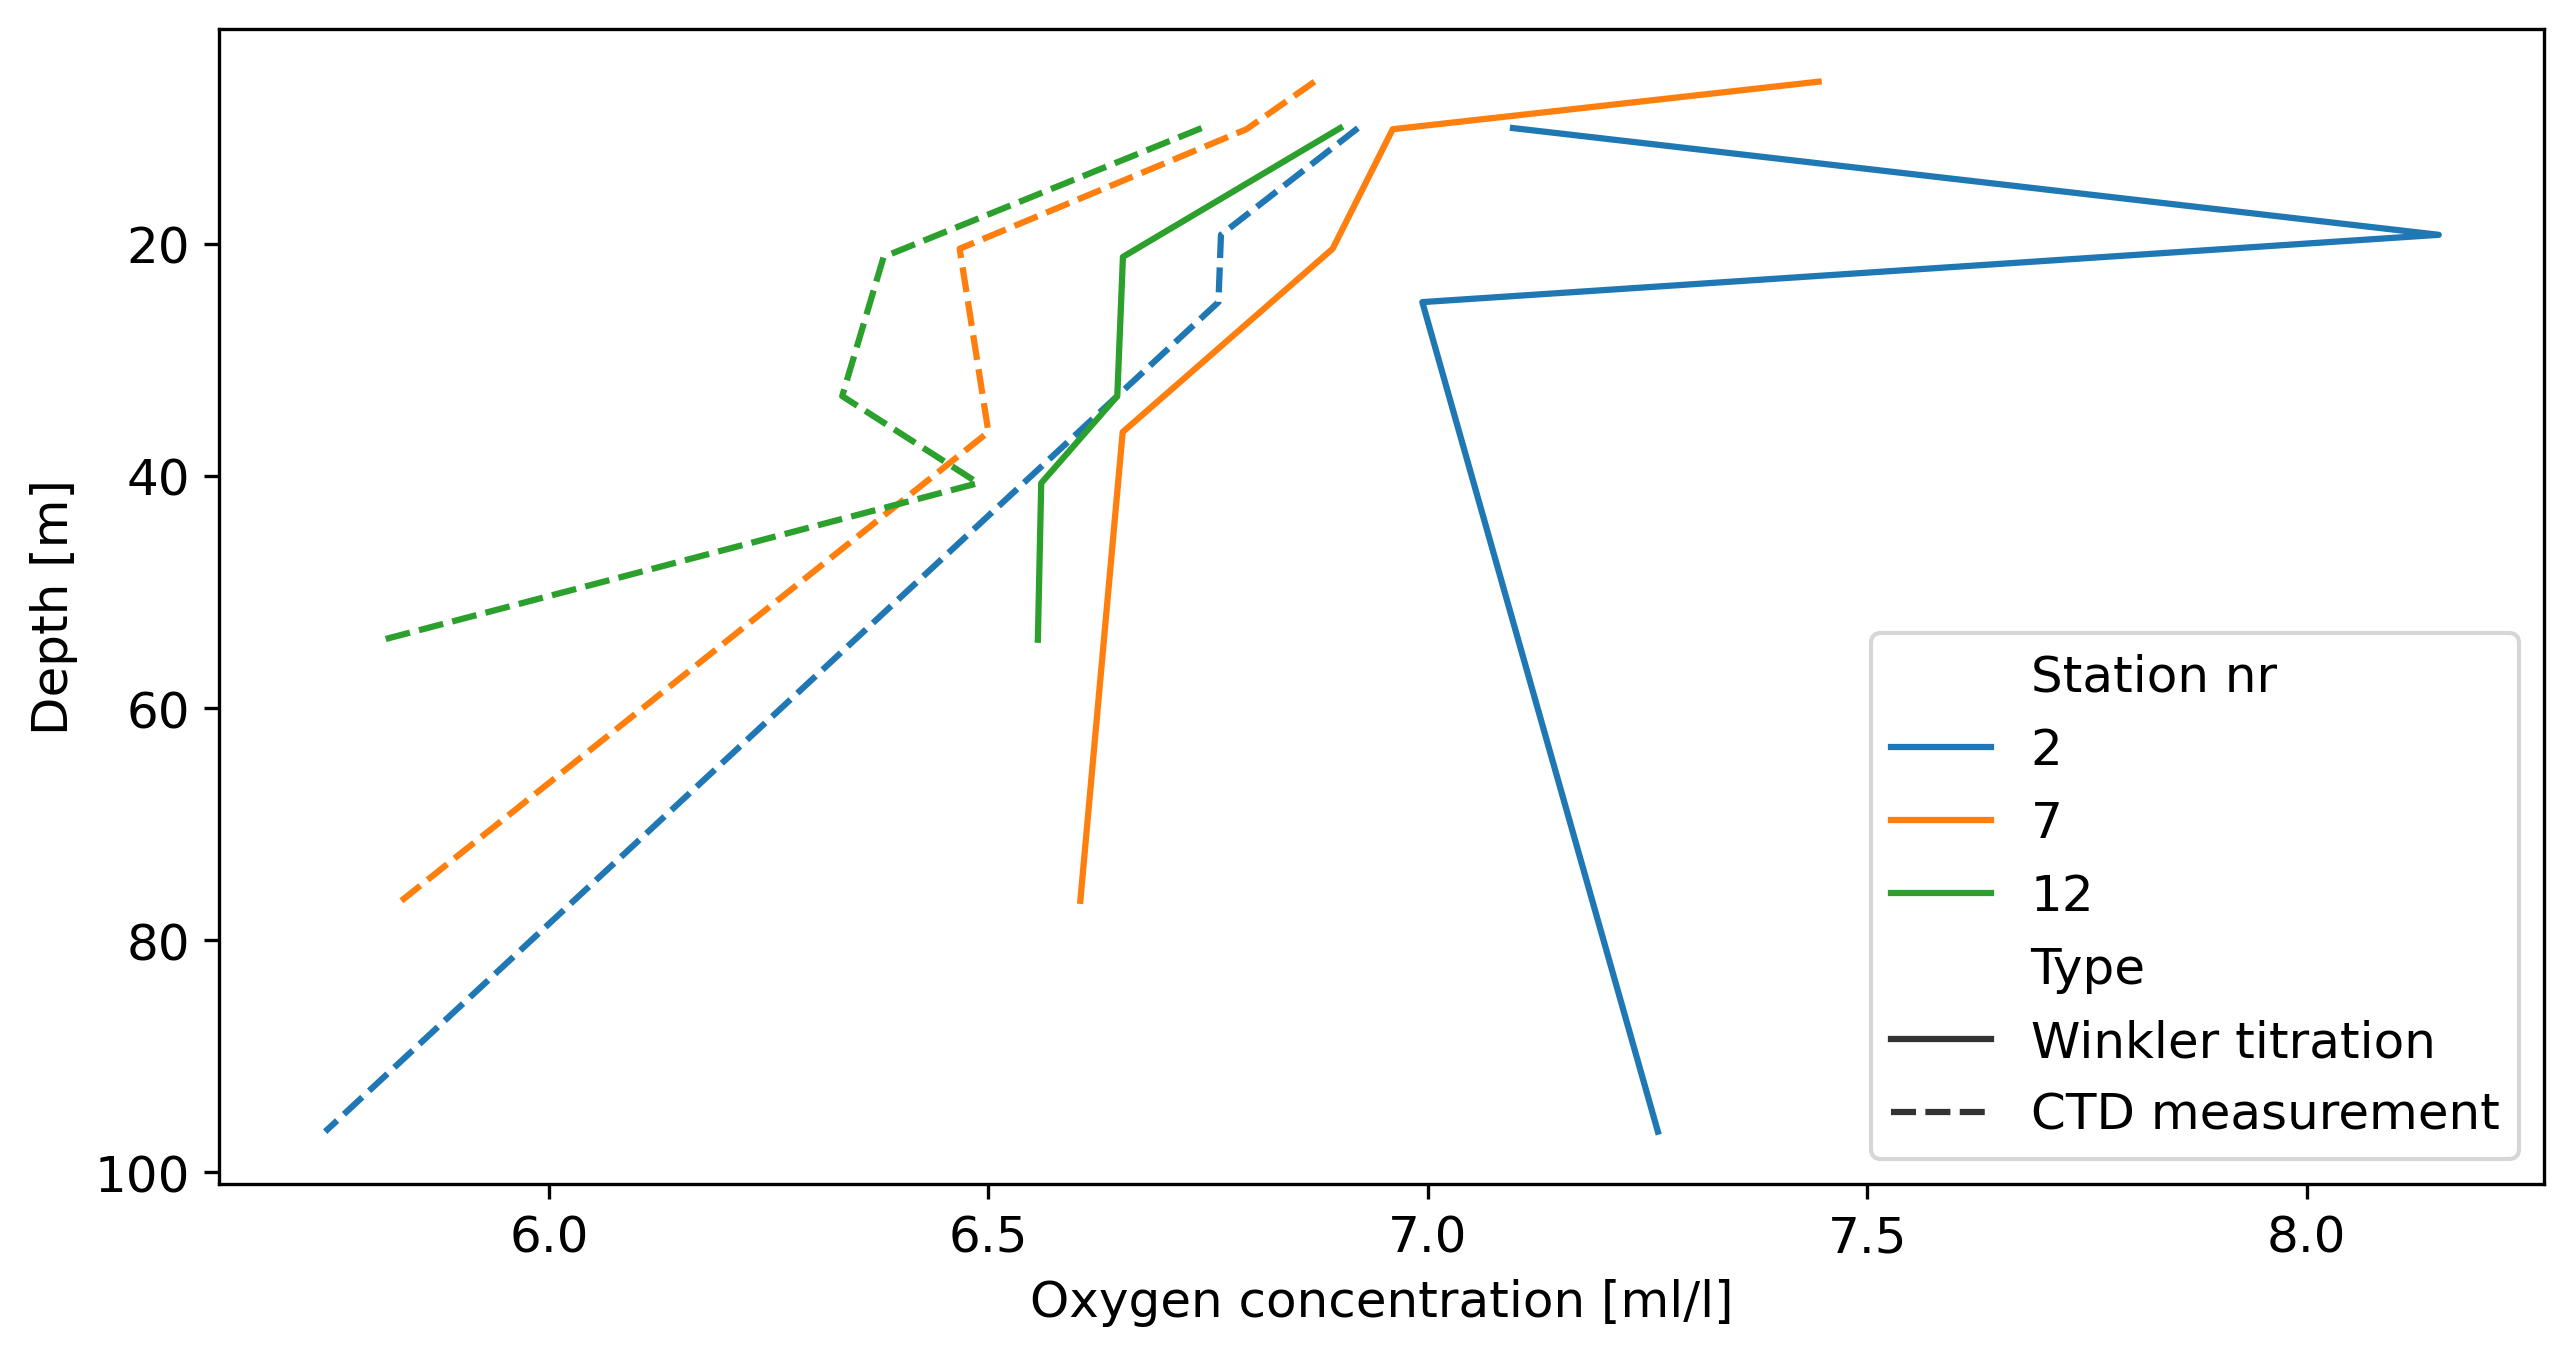

In [94]:
# Create a dictionary for seaborn plot
data = {'Depth [m]': np.concatenate((depinds[0],depinds[1],depinds[2],depinds[0],depinds[1],depinds[2])),
        'Oxygen concentration [ml/l]': np.concatenate((oxytits[0],oxytits[1],oxytits[2],oxyavs[0],oxyavs[1],oxyavs[2])),
        'Type': ['Winkler titration']*len(oxytits[0]) + ['Winkler titration']*len(oxytits[1]) + ['Winkler titration']*len(oxytits[2])+ ['CTD measurement']*len(oxyavs[0])+ ['CTD measurement']*len(oxyavs[1])+ ['CTD measurement']*len(oxyavs[2]),
        'Station nr': ['2']*len(oxytits[0]) + ['7']*len(oxytits[1]) + ['12']*len(oxytits[2])+ ['2']*len(oxyavs[0])+ ['7']*len(oxyavs[1])+ ['12']*len(oxyavs[2])}

p = sns.lineplot(data=data, x='Oxygen concentration [ml/l]', y='Depth [m]', hue='Station nr', style='Type',orient='y')

plt.gca().invert_yaxis()
p.legend()

#### We do a regression, ie plotting the values against eachother, but there is no clear correlation

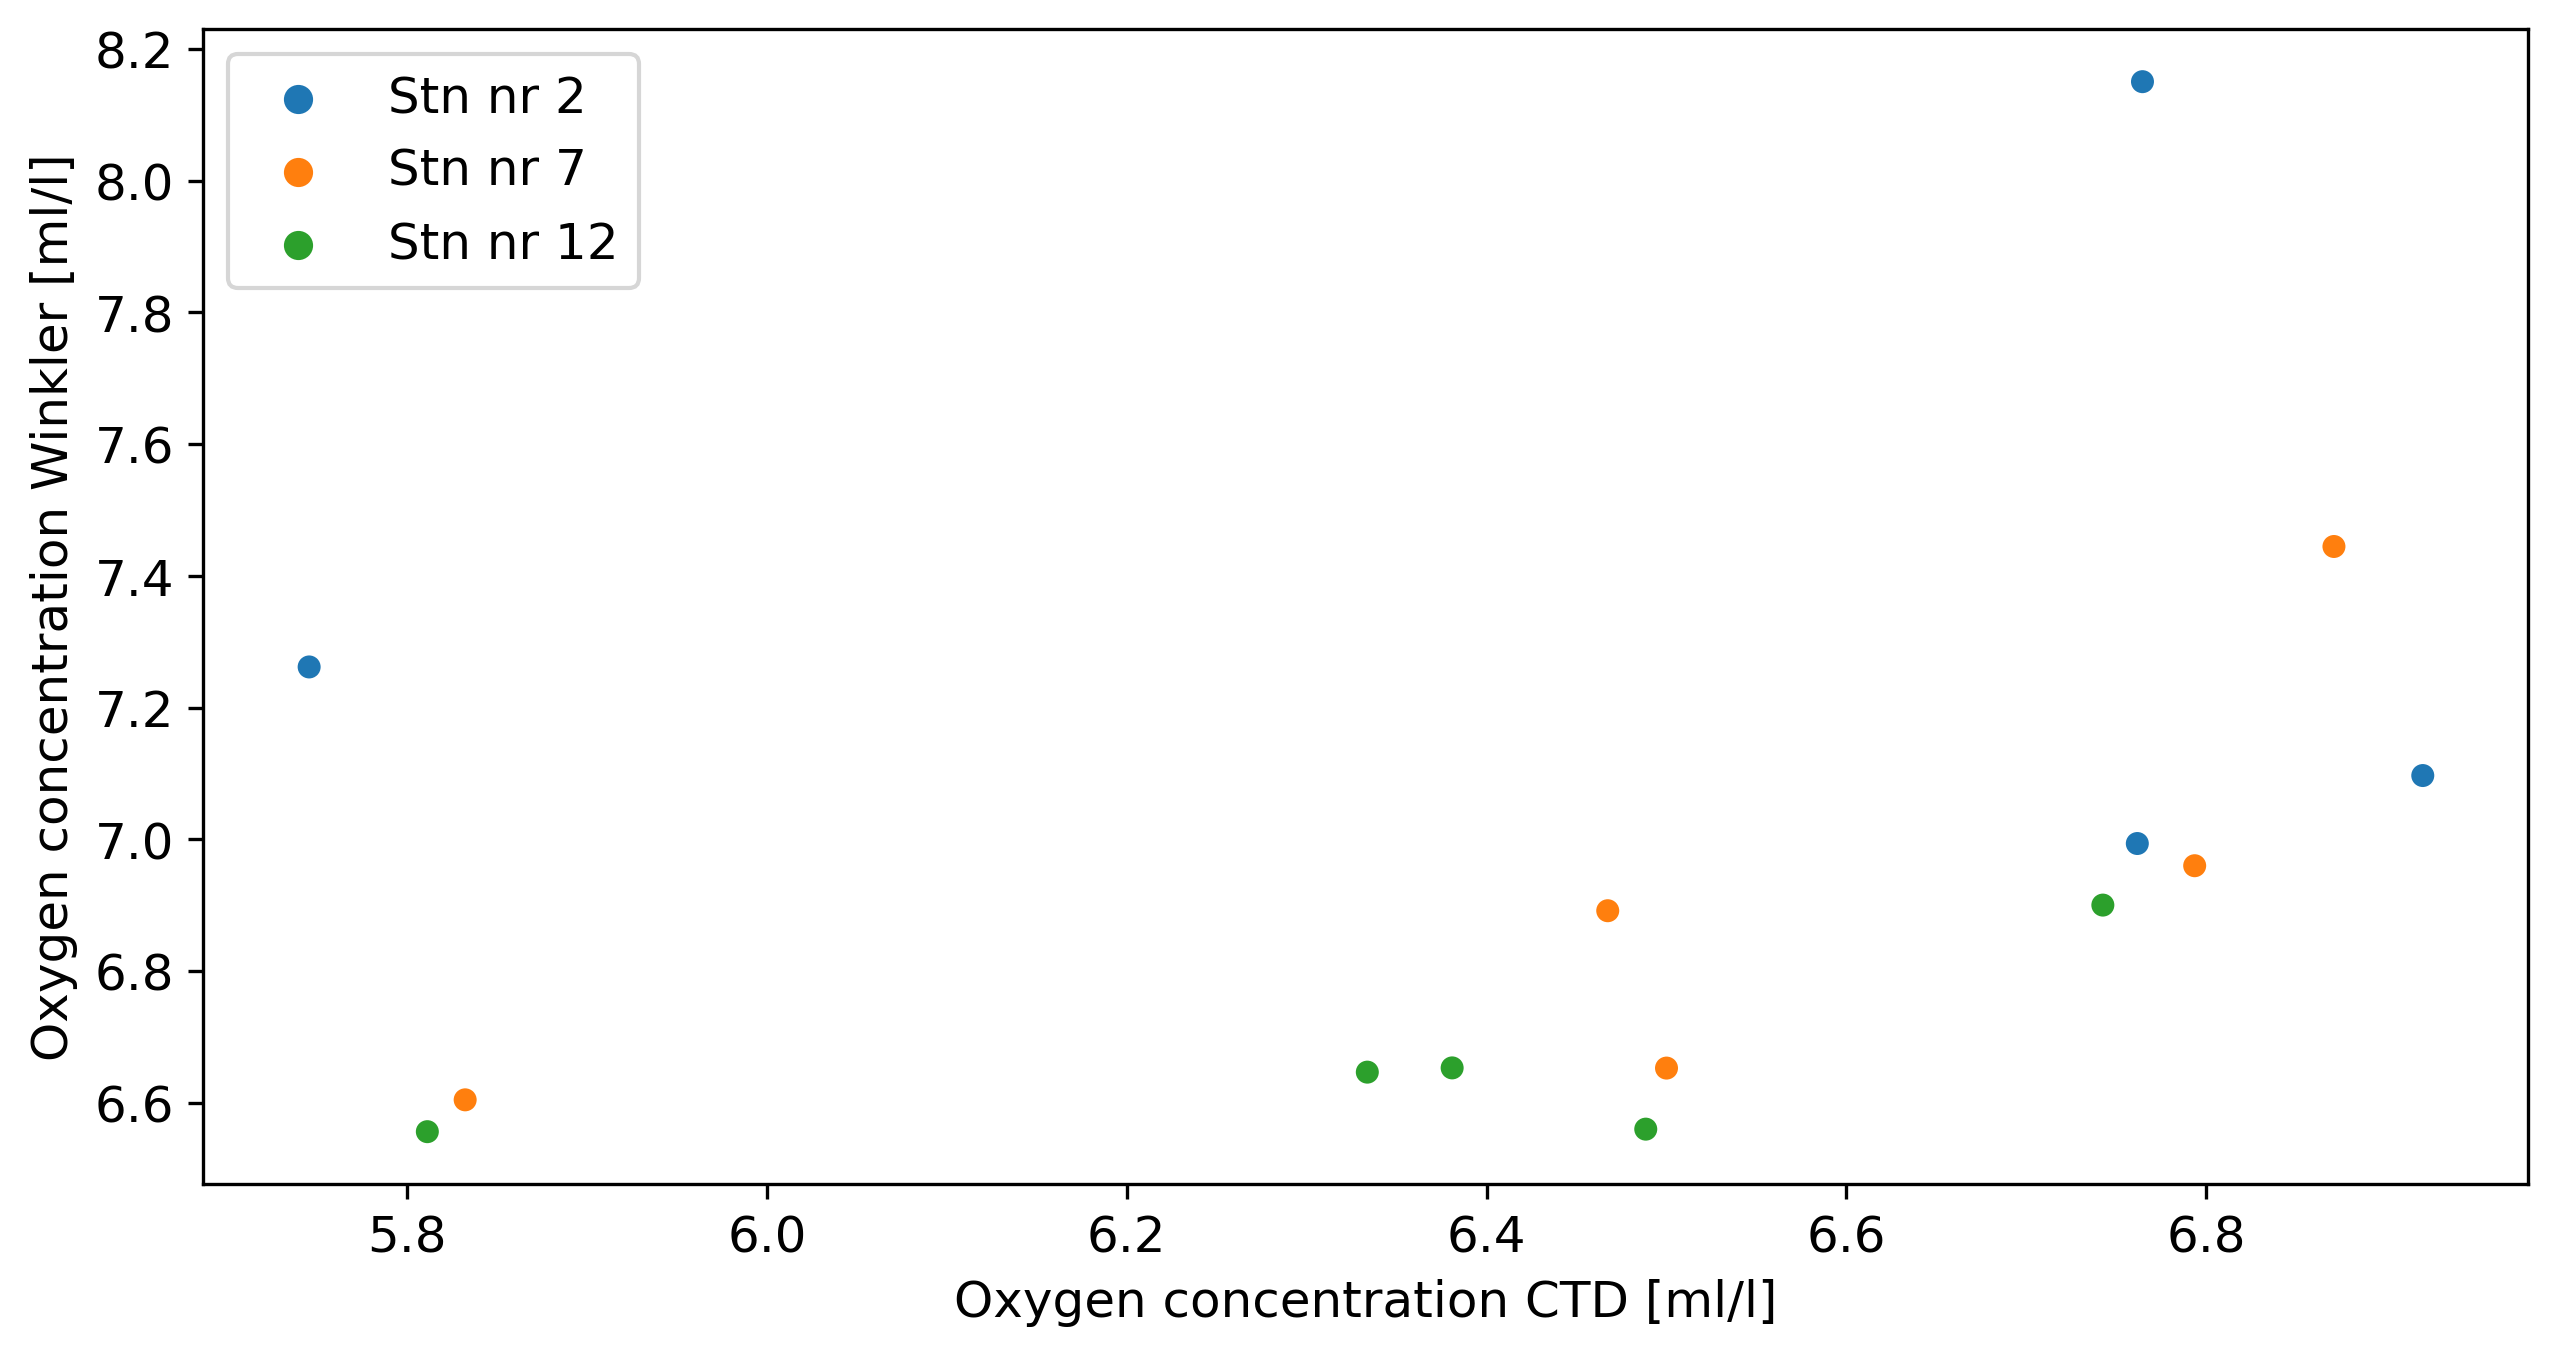

In [97]:
data = {'Oxygen concentration Winkler [ml/l]': np.concatenate((oxytits[0],oxytits[1],oxytits[2])),
        'Oxygen concentration CTD [ml/l]': np.concatenate((oxyavs[0],oxyavs[1],oxyavs[2])),
        'Station nr': ['Stn nr 2']*len(oxytits[0]) + ['Stn nr 7']*len(oxytits[1]) + ['Stn nr 12']*len(oxytits[2])}

p = sns.scatterplot(data=data, x='Oxygen concentration CTD [ml/l]', y='Oxygen concentration Winkler [ml/l]', hue='Station nr')

p.legend()

## We can conclude that this relation is to unclear to say that we should recalibrate the CTD, therefore we will not perform a calibration of the CTD.